# Makeover Monday 2019 Week 14 - Waste on UK Beaches
by Susan Glass
<p><p><i>Many thanks to Eva Murray and Andy Kriebel, for their incredible work and dedication in running the Makeover Monday community project.</i>

# References and Acknowledgements
<p>Makeover Monday Week 14: http://www.makeovermonday.co.uk/data/
<p>Original Article: https://www.bbc.com/news/science-environment-42264788
<p>Great British Clean Report: https://www.mcsuk.org/media/GBBC_2017_Report.pdf
<p>Data on data.world: https://data.world/makeovermonday/2019w14
<p>nbviewer link for this notebook: 
    
<p><p><p><p>Additional Helpful References this week:
    <li>https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e</li>
    <li> HTML Color Names: https://htmlcolorcodes.com/color-names/</li>

In [2]:
# Library imports
import pandas as pd
import numpy as np
import random

# Cufflinks and plotly imports
# See https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e
# Standard plotly imports
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly import tools
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
# Import data
df_data = pd.read_excel('https://query.data.world/s/d63432o6pwahfd56pzoxewncrf6vu2')
df_data

,Item,Number per 100m of beach
0,Plastic / polystyrene pieces (0–50 cm),225.3
1,"Packets (crisp, sweet, lolly, sandwich)",42.3
2,Glass,40.4
3,Cigarette stubs,34.5
4,Caps & lids,32.9
5,String / cord (thickness 0–1 cm),31.0
6,Wet wipes,27.4
7,Cotton bud sticks,26.9
8,Fishing line,18.0
9,Cutlery / trays / straws,15.1


In [4]:
# Add a row for "Unspecified" items
# Report says that 718 total items were found per 100 meters
df_data = df_data.append({'Item': 'Unspecified', 'Number per 100m of beach': \
                718 - df_data['Number per 100m of beach'].sum()}, ignore_index=True) \
                .sort_values(by='Number per 100m of beach',ascending=False)

# Also add percent of total column
df_data['Percent'] = df_data['Number per 100m of beach'] / df_data['Number per 100m of beach'].sum()

df_data

,Item,Number per 100m of beach,Percent
0,Plastic / polystyrene pieces (0–50 cm),225.3,0.313788
10,Unspecified,224.2,0.312256
1,"Packets (crisp, sweet, lolly, sandwich)",42.3,0.058914
2,Glass,40.4,0.056267
3,Cigarette stubs,34.5,0.048050
4,Caps & lids,32.9,0.045822
5,String / cord (thickness 0–1 cm),31.0,0.043175
6,Wet wipes,27.4,0.038162
7,Cotton bud sticks,26.9,0.037465
8,Fishing line,18.0,0.025070


In [5]:
# Dictionaries and arrays
shortname = {'Packets (crisp, sweet, lolly, sandwich)': 'Food wrappers',
             'Glass': 'Glass',
             'Caps & lids': 'Caps & lids',
             'Cutlery / trays / straws': 'Cutlery etc.' ,
             'String / cord (thickness 0–1 cm)': 'String/cord',
             'Plastic / polystyrene pieces (0–50 cm)': 'Plastic', 
             'Unspecified': 'Unspecified',
             'Cigarette stubs': 'Cigarette stubs',
             'Wet wipes': 'Wet wipes',
             'Cotton bud sticks': 'Q-tips',
             'Fishing line': 'Fishing line'           
            }
togo_items = ['Packets (crisp, sweet, lolly, sandwich)', \
             'Glass', \
             'Caps & lids', \
             'Cutlery / trays / straws']

# Add columns for for short names, to-go categories, sort order
df_data['shortname'] = df_data['Item'].map(shortname)
df_data['is_togo'] = df_data.apply(lambda x: 'To-Go'if x.Item in togo_items 
                                      else 'Other', 
                                      axis=1)
df_data['togo_color'] = df_data.apply(lambda x: 'lightsteelblue'if x.Item in togo_items 
                                      else 'whitesmoke', 
                                      axis=1)
df_data['formatted_value'] = df_data['Number per 100m of beach'].astype(str) + ' items per 100m of beach'
# Sort: 1) All togo items, sorted descending by value
# 2) All other items, sorted descending by value
df_data['togo_sort_value'] = df_data.apply(lambda x: 
                                      1000*x['Number per 100m of beach'] if x.Item in togo_items 
                                      else x['Number per 100m of beach'], 
                                      axis=1)
df_data = df_data.sort_values(by='togo_sort_value', ascending=False)
df_data

,Item,Number per 100m of beach,Percent,shortname,is_togo,togo_color,formatted_value,togo_sort_value
1,"Packets (crisp, sweet, lolly, sandwich)",42.3,0.058914,Food wrappers,To-Go,lightsteelblue,42.3 items per 100m of beach,42300.0
2,Glass,40.4,0.056267,Glass,To-Go,lightsteelblue,40.4 items per 100m of beach,40400.0
4,Caps & lids,32.9,0.045822,Caps & lids,To-Go,lightsteelblue,32.9 items per 100m of beach,32900.0
9,Cutlery / trays / straws,15.1,0.021031,Cutlery etc.,To-Go,lightsteelblue,15.1 items per 100m of beach,15100.0
0,Plastic / polystyrene pieces (0–50 cm),225.3,0.313788,Plastic,Other,whitesmoke,225.3 items per 100m of beach,225.3
10,Unspecified,224.2,0.312256,Unspecified,Other,whitesmoke,224.2 items per 100m of beach,224.2
3,Cigarette stubs,34.5,0.048050,Cigarette stubs,Other,whitesmoke,34.5 items per 100m of beach,34.5
5,String / cord (thickness 0–1 cm),31.0,0.043175,String/cord,Other,whitesmoke,31.0 items per 100m of beach,31.0
6,Wet wipes,27.4,0.038162,Wet wipes,Other,whitesmoke,27.4 items per 100m of beach,27.4
7,Cotton bud sticks,26.9,0.037465,Q-tips,Other,whitesmoke,26.9 items per 100m of beach,26.9


In [6]:
# See https://plot.ly/pandas/pie-charts/
df_data.iplot(kind='pie',labels='Item',values='Number per 100m of beach',hole=.6,
          colorscale='Set3',hoverinfo='label+percent',textinfo='percent',sort=True)

In [7]:
# I'd like to depict the 718 individual items in the 100 meters
# Loop through df_data and create n new dataframe rows for each row of n items
# Pick width of beach = 160m
d = []
for index, row in df_data.iterrows():
    for x in range(0, round(row['Number per 100m of beach'])):
        d.append({'Category': row['Item'],'X': random.randint(1, 100),'Y': random.randint(1, 160) })

df_100m = pd.DataFrame(d)
print(df_100m['Category'].value_counts())
df_100m.describe()

Plastic / polystyrene pieces (0–50 cm)     225
Unspecified                                224
Packets (crisp, sweet, lolly, sandwich)     42
Glass                                       40
Cigarette stubs                             34
Caps & lids                                 33
String / cord (thickness 0–1 cm)            31
Cotton bud sticks                           27
Wet wipes                                   27
Fishing line                                18
Cutlery / trays / straws                    15
Name: Category, dtype: int64


,X,Y
count,716.000000,716.000000
mean,50.156425,82.994413
std,29.669661,45.010799
min,1.000000,1.000000
25%,23.000000,45.000000
50%,51.000000,83.000000
75%,75.000000,118.250000
max,100.000000,160.000000


In [8]:
# The following code for using images to create a "scatterplot" is from:
# https://stackoverflow.com/questions/25329583/matplotlib-using-image-for-points-on-plot

from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Load images.
wipes_marker = plt.imread('wipes.png')
blob_marker = plt.imread('blob.png')
cap_marker = plt.imread('bottle-cap.png')
chips_marker = plt.imread('chips.png')
cig_marker = plt.imread('cigarette.png')
cord_marker = plt.imread('cord-lace.png')
qtip_marker = plt.imread('cotton-swab.png')
fishingline_marker = plt.imread('fishing_line.png')
fork_marker = plt.imread('fork.png')
glass_marker = plt.imread('glass.png')
bottle_marker = plt.imread('plastic-bottle.png')

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Plots an image at each x and y location. 
def plotImage(xData, yData, im):
    for x, y in zip(xData, yData):
        bb = Bbox.from_bounds(x,y,1,1)  
        bb2 = TransformedBbox(bb,ax.transData)
        bbox_image = BboxImage(bb2,
                            norm = None,
                            origin=None,
                            clip_on=False)

        bbox_image.set_data(im)
        ax.add_artist(bbox_image)

df_wipes = df_100m.query('Category=="Wet wipes"')
plotImage(df_wipes['X'], df_wipes['Y'], wipes_marker)
#plotImage(redX, redY, redMarker)

# Set the x and y limits
ax.set_ylim(0,160)
ax.set_xlim(0,100)

plt.show()

<Figure size 1200x800 with 1 Axes>

In [77]:
# Ugh - cutting my losses

In [9]:
# Return to a donut chart - use custom colors, specify borders
# Map the colors
# see https://stackoverflow.com/questions/49885837/python-plotly-assigning-scatterplot-colors-by-label
# Pie chart default sort of largest > smallest value overrides df sort
colorsIdx = {'Packets (crisp, sweet, lolly, sandwich)': 'rgb(250, 128, 114)',
             'Glass': 'rgb(255, 36, 0)',
             'Caps & lids': 'rgb( 202,52,51)',
             'Cutlery / trays / straws': 'rgb(164, 90, 82)',
             'Plastic / polystyrene pieces (0–50 cm)': 'rgb(255, 253, 208)', 
             'Unspecified': 'rgb(255, 253, 208)',
             'Cigarette stubs': 'rgb(255, 253, 208)',
             'Wet wipes': 'rgb(255, 253, 208)',
             'Fishing line': 'rgb(255, 253, 208)'           
            }
cols = df_data['Item'].map(colorsIdx)

# Create 2 traces - 1 for inside and 1 for outside
# See https://community.plot.ly/t/text-position-inside-for-label-and-outside-for-value-pie-chart/8952/4
common_props = dict(labels=df_data['Item'],
               values=df_data['Number per 100m of beach'],
               hoverinfo='label+value', 
               textfont=dict(size=12),
               hole=.6,
               marker=dict(colors=cols, 
                           line=dict(color='#000000', width=2)))

# Use 2 traces on top of one another to get inside and outside labels
trace1 = go.Pie(
    **common_props, 
   textinfo='label', 
   textposition='outside')
trace2 = go.Pie(
    **common_props,
    textinfo='value',
    textposition='inside')

#data = [trace]
iplot([trace1, trace2], filename='basic_donut_chart')

In [80]:
# OK I'm going with this plot. Will emphasize the to-go items.
# Try to get all the "to-go" items together with one color
# Simplify the plot -put all to-go items together, make them the same color, remove legend
# Will ultimately use a bar plot on the right as a legend

In [10]:
# Pie chart examples and multi-figure layouts: https://plot.ly/python/pie-charts/

# Using textinfo=text allows entry of values other than the label,
# which defines the sections of the pie chart.  This is turn allows some
# sections to have no labels (removing values from labels will remove sections
# from the pie chart)
df_data = df_data.sort_values(by='togo_sort_value', ascending=False)
fig = {
  "data": [
    {
      "values": df_data['Number per 100m of beach'],
      "labels": df_data['Item'],
      "domain": {"x": [0, .48]},
      "name": "Togo Trash Donut",
      "hoverinfo":'label+value', 
      "hole": .6,
      "type": "pie",
      "textinfo":"text",
        "sort":False,    # Remove the default sort of largest value to smallest
      "text":[shortname.get(val) if val in togo_items else '' 
              for val in df_data['Item']], 
      "textposition":'outside',
      'marker': {'colors': df_data['togo_color'],
                    'line':{'color':'gray', 'width':2}
                }
    }
  ],
  'layout': 
    {
        #'title': 'To-go Trash Found on UK Beaches',
        'showlegend': False,
        'font':{'family':'Arial', 'size':16, 'color':'black'}
    }
}
py.iplot(fig, filename='togo_donut_1')


In [11]:
# Actually I think the donut chart should just label the To-Go
# The bar chart will show all the sections
df_data = df_data.sort_values(by='togo_sort_value', ascending=False)
df_togo_groups = df_data.groupby('is_togo')['Number per 100m of beach'] \
            .sum().to_frame().reset_index()

fig = {
  "data": [
    {
        "values": df_data['Number per 100m of beach'],
      "labels": df_data['Item'],
      "domain": {"x": [0, .48]},
      "name": "Togo Trash Donut 2",
      "hoverinfo":'label+value', 
      "hole": .6,
      "type": "pie",
      "textinfo":"text",
      "text": ['To-Go Trash' if val == 'Glass'
                            else '' for val in df_data['Item']], 
        "sort":False,    # Remove the default sort of largest value to smallest
      "textposition":'outside',
      'marker': {'colors': df_data['togo_color'],
                    'line':{'color':'gray', 'width':2}
                }
    }
  ],
  'layout': 
    {
       'title': 'To-go Trash Found on UK Beaches',
        'showlegend': False,
        'font':{'family':'Arial', 'size':16, 'color':'black'}
    }
}
py.iplot(fig, filename='togo_donut_2')



In [17]:
# OK let's do the bar chart
# Even the short labels get cut off -- so increase the left margin size in layout
df_data = df_data.sort_values(by='Number per 100m of beach', ascending=True)

trace1 = go.Bar(
    x=df_data['Number per 100m of beach'],
    y=df_data['shortname'],
    hoverinfo='y+x', 
    marker=dict(
        color=df_data['togo_color'],
        line=dict(
            color='gray',
            width=2)
    ),
    orientation='h'
)

layout1 = go.Layout(
    autosize=True,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=go.layout.XAxis(automargin=True),
    showlegend=False
)

traces=[trace1]
fig = go.Figure(data=traces)
py.iplot(traces, filename='togo_bar_chart')

In [12]:
# Now put them side by side
# OK there's a fundamental problm that I don't think can be resolved
# Pie charts can only use the "domain" attribute for lining up multiple plots
# They can't use layout (see https://plot.ly/python/pie-charts/)
# However, bar charts must use the layout 
# I'm not sure there's any way to put pie/donut and bar chart side by side in plotly
df_data = df_data.sort_values(by='togo_sort_value', ascending=False)

trace0 = go.Pie(
   labels=df_data['Item'],
   values=df_data['Number per 100m of beach'],
   hoverinfo='label+value', 
   textfont=dict(size=12),
   hole=.6,
    marker=dict(
        colors=df_data['togo_color'],
        line=dict(
            color='gray',
            width=2)
    ), 
   textinfo='label', 
   textposition='outside'
)

trace1 = go.Bar(
    x=df_data['Number per 100m of beach'],
    y=df_data['Item'],
    hoverinfo='y+x', 
    marker=dict(
        color=df_data['togo_color'],
        line=dict(
            color='gray',
            width=2)
    ),
    orientation='h'
)

fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=800, subplot_titles=('Donut', 'Bar'))

py.iplot(fig, filename='simple-subplot-with-annotations')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



ValueError: Invalid property specified for object of type plotly.graph_objs.Pie: 'xaxis'

    Valid properties:
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        direction
            Specifies the direction at which succeeding sectors
            follow one another.
        dlabel
            Sets the label step. See `label0` for more info.
        domain
            plotly.graph_objs.pie.Domain instance or dict with
            compatible properties
        hole
            Sets the fraction of the radius to cut out of the pie.
            Use this to make a donut chart.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objs.pie.Hoverlabel instance or dict with
            compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". See https://github.com/d3/d3-format
            /blob/master/README.md#locale_format for details on the
            formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available. variables `label`, `color`, `value`,
            `percent` and `text`. Anything contained in tag
            `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>".
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Sets hover text elements associated with each sector.
            If a single string, the same string appears for all
            data points. If an array of string, the items are
            mapped in order of this trace's sectors. To be seen,
            trace `hoverinfo` must contain a "text" flag.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        insidetextfont
            Sets the font used for `textinfo` lying inside the pie.
        label0
            Alternate to `labels`. Builds a numeric set of labels.
            Use with `dlabel` where `label0` is the starting label
            and `dlabel` the step.
        labels
            Sets the sector labels. If `labels` entries are
            duplicated, we sum associated `values` or simply count
            occurrences if `values` is not provided. For other
            array attributes (including color) we use the first
            non-empty entry among all occurrences of the label.
        labelssrc
            Sets the source reference on plot.ly for  labels .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            plotly.graph_objs.pie.Marker instance or dict with
            compatible properties
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        outsidetextfont
            Sets the font used for `textinfo` lying outside the
            pie.
        pull
            Sets the fraction of larger radius to pull the sectors
            out from the center. This can be a constant to pull all
            slices apart from each other equally or an array to
            highlight one or more slices.
        pullsrc
            Sets the source reference on plot.ly for  pull .
        rotation
            Instead of the first slice starting at 12 o'clock,
            rotate to some other angle.
        scalegroup
            If there are multiple pies that should be sized
            according to their totals, link them by providing a
            non-empty group id here shared by every trace in the
            same group.
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        sort
            Determines whether or not the sectors are reordered
            from largest to smallest.
        stream
            plotly.graph_objs.pie.Stream instance or dict with
            compatible properties
        text
            Sets text elements associated with each sector. If
            trace `textinfo` contains a "text" flag, these elements
            will be seen on the chart. If trace `hoverinfo`
            contains a "text" flag and "hovertext" is not set,
            these elements will be seen in the hover labels.
        textfont
            Sets the font used for `textinfo`.
        textinfo
            Determines which trace information appear on the graph.
        textposition
            Specifies the location of the `textinfo`.
        textpositionsrc
            Sets the source reference on plot.ly for  textposition
            .
        textsrc
            Sets the source reference on plot.ly for  text .
        title
            plotly.graph_objs.pie.Title instance or dict with
            compatible properties
        titlefont
            Deprecated: Please use pie.title.font instead. Sets the
            font used for `title`. Note that the title's font used
            to be set by the now deprecated `titlefont` attribute.
        titleposition
            Deprecated: Please use pie.title.position instead.
            Specifies the location of the `title`. Note that the
            title's position used to be set by the now deprecated
            `titleposition` attribute.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        values
            Sets the values of the sectors of this pie chart. If
            omitted, we count occurrences of each label.
        valuessrc
            Sets the source reference on plot.ly for  values .
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        

In [13]:
fig = {
  "data": [
    {
        "values": df_data['Number per 100m of beach'],
      "labels": df_data['Item'],
      "domain": {"x": [0, .48]},
      "name": "donut chart",
      "hoverinfo":'label+value', 
      "hole": .6,
      "type": "pie",
      "textinfo":"text",
      "text": ['To-Go Trash' if val == 'Glass'
                            else '' for val in df_data['Item']], 
        "sort":False,    # Remove the default sort of largest value to smallest
      "textposition":'outside',
      'marker': {'colors': df_data['togo_color'],
                    'line':{'color':'gray', 'width':2}
                }
    },
    {
      "x": df_data['Number per 100m of beach'],
      "y": df_data['Item'],
      #"domain": {"x": [.52, 1]},
      'marker': {'color': df_data['togo_color'],
                    'line':{'color':'gray', 'width':2}
                },
      "name": "bar chart",
      "orientation":"h",
      "type": "bar"
    }], 
  "layout": {
        "title":"To-go Trash Found on UK Beaches",
        'showlegend': False,
    }
}
iplot(fig, filename='donut_and_bar')


In [ ]:
# All right this isn't going to work!

In [131]:
df_data.iplot(
    kind='pie',
    labels='Item',
   values='Number per 100m of beach',
   hoverinfo='label+value', 
   hole=.6,
   textinfo='label', 
   textposition='outside')

<BarContainer object of 11 artists>

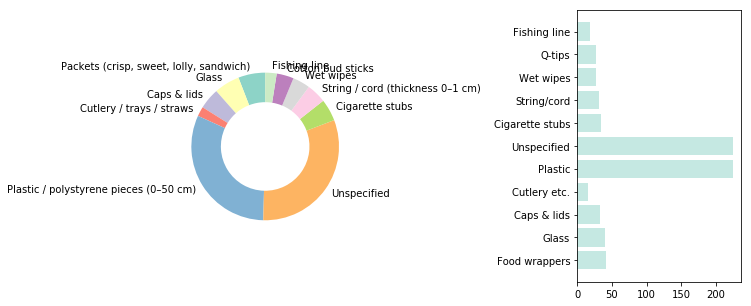

In [31]:
# Let's try side by side using matplotlib and subplots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Bar plots and line plots don't use colormaps.
# To change default colors, you need to change the color cycler
# See https://stackoverflow.com/questions/46768859/how-to-change-the-default-colors-for-multiple-plots-in-matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)

plt.figure(figsize = [10, 5]) # larger figure size for subplots

# pie chart
# Needed to add extra blank column because labels overflowed
plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
plt.pie(df_data['Number per 100m of beach'], 
        labels = df_data['Item'], 
        startangle = 90, 
        wedgeprops = {'width' : 0.4}); 
        # startangle = 90: start first slice vertically upward);
plt.axis('square'); # scale x and y axis equally

# bar plot
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 2
plt.barh(df_data['shortname'], df_data['Number per 100m of beach'], align='center', alpha=0.5)
 
#plt.show()